# Time Series
- White Noise process(백음 잡음 과정)
- Moving Average process(MA model)
- Autoregressive model(AR model)

## Stationarity

1. $ E|Y_{t}| < \infty $
2. $ EY_{t} = \mu $ For all t
3. $ VarY_{t} = \sigma^{2} $ For all t
4. $ Cov(Y_{t}, Y_{t-1}) = Cov(Y_{t-k}, Y_{t-1-k})$ For all t 

### [1] White Noise : 과거 정보가 현재에 영향을 주지 않음

$Y_{y} = \epsilon_{t} $

$\epsilon_{t} 가 (0, \sigma) 분포를 따름$



- 기본 가정

1. $EY_{t} = 0$ For  all t 
2. $VarY_{t} = \sigma^{2} $ For all t
3. $Cov(Y_{t}$, $Y_{t-j}) = 0 $ For all j

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

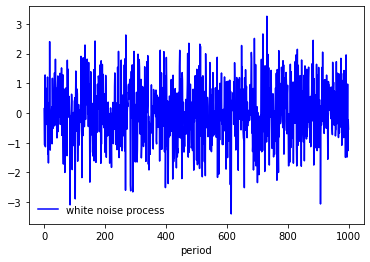

In [4]:
# WN
y = np.zeros(1000)

for i in range(len(y)):
    y[i] = np.random.normal(0, 1)


plt.figure()

plt.plot(y, color='blue', label='white noise process')
plt.xlabel('period')
plt.legend(loc='lower left', frameon=False)

plt.show()

### [2] Moving Average process MA(p)
 : 과거의 뉴스가 현재에 영향을 줌

$ Y_{t} = \mu + \epsilon_{t} + \theta \epsilon_{t-1}$

- Inf가 대표적인 MA(1) model

- $ \theta $ 는 상관관계를 의미
    - $ \theta $ 가 양수일 경우, 과거 영향력 유지하는 모습을 보임
    - $ \theta $ 가 음수일 경우, 과거 영향력에 반대되는 모습을 보임

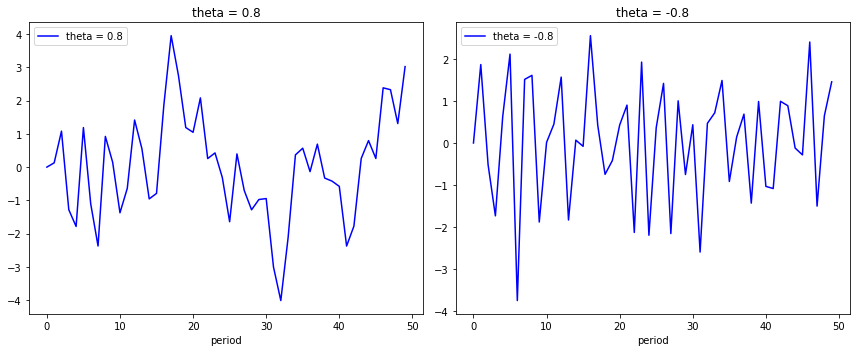

In [5]:
np.random.seed(123)

y = np.zeros(50)
a = np.random.normal(0, 1, len(y))


plt.figure(figsize=(12, 5))


for idx, theta in enumerate([0.8, -0.8], start=1):
    y[0] = 0 
    
    
    for i in range(1, len(y)):
        y[i] = a[i] + theta * a[i-1]
    
   
    plt.subplot(1, 2, idx)
    plt.plot(y, color='blue')
    plt.xlabel('period')
    plt.title(f'theta = {theta}')
    plt.legend([f'theta = {theta}'], loc='upper left')
    
plt.tight_layout()
plt.show()


### [3] Autoregressive model  AR(p)
 : 과거 자신이 현재에 영향을 줌

$ Y_{t} = \phi_{0} + \phi_{1}Y_{t-1} + \epsilon_{t}$

- $ \phi_{1} $ 는 관성 파라미터
    - $ \phi_{1} $ 가 클수록 지속성을 지님

- AR 무한차수로 보낼 시, MA($ \infty $)로 표현 가능
    - $ Y_{t} = \epsilon_{t} + \phi_{1}\epsilon_{t-1} + \phi_{1}^{2}\epsilon_{t-1} +  \phi_{1}^{3}\epsilon_{t-2} + \dots \phi_{1}^{n}\epsilon_{t-n} $
    - 즉, 현재 정보는 $ \sum 과거 정보$

- 실업률 같은 거시 지표가 대표적인 AR(p) model

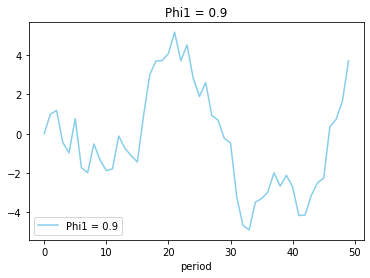

In [8]:
np.random.seed(123)

y = np.zeros(50)
a = np.random.normal(0, 1, len(y))


y[0] = 0

phi1 = 0.9

for i in range(1, len(y)):
    y[i] = phi1 * y[i-1] + a[i]


plt.figure()
plt.plot(y, color='skyblue')
plt.xlabel('period')
plt.title(f'Phi1 = {phi1}')
plt.legend([f'Phi1 = {phi1}'], loc='lower left')
plt.show()


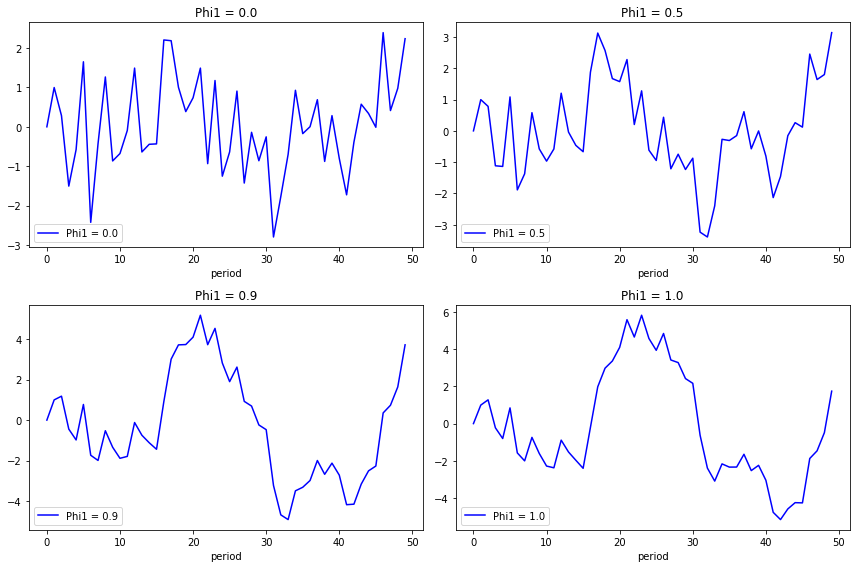

In [12]:
# 다양한 phi1 값에 대한 시뮬레이션
plt.figure(figsize=(12, 8))
phi_values = [0.0, 0.5, 0.9, 1.0]
for idx, phi1 in enumerate(phi_values, start=1):
    y[0] = 0  # 초기값 설정
    for i in range(1, len(y)):
        y[i] = phi1 * y[i-1] + a[i]
    
    plt.subplot(2, 2, idx)
    plt.plot(y, color='blue')
    plt.xlabel('period')
    plt.title(f'Phi1 = {phi1}')
    plt.legend([f'Phi1 = {phi1}'], loc='lower left')

plt.tight_layout()
plt.show()


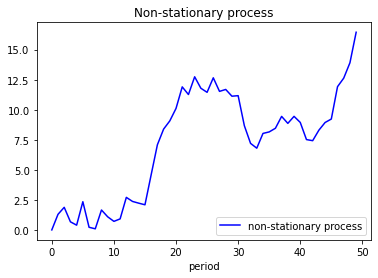

In [16]:
# 상수항이 포함된 AR(1) 모형
phi0 = 0.3
phi1 = 1.0 

y[0] = 0  # 초기값 설정
for i in range(1, len(y)):
    y[i] = phi0 + phi1 * y[i-1] + a[i]

# 상수항이 포함된 AR(1) 모형의 시뮬레이션 
plt.figure()
plt.plot(y, color='blue')
plt.xlabel('period')
plt.title('Non-stationary process')
plt.legend(['non-stationary process'], loc='lower right')
plt.show()

### MA vs AR 

- ACF (Autocorrelation Function, 자기상관함수)
- PACF (Partial Autocorrelation Function, 부분 자기상관함수)

        - ACF가 지수적으로 감소하고, PACF가 특정 lag에서 급격히 감소
        - ACF 그래프에서 스파이크가 나타나는 lag가 모형의 차수(p)
                = AR(p) 
                
        - ACF가 특정 lag에서 급격히 감소하고, PACF가 지수적으로 감소
        - ACF 그래프에서 스파이크가 나타나는 lag가 모형의 차수(q)
                = MA(p)

<Figure size 432x288 with 0 Axes>

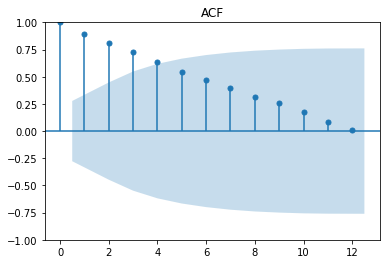

In [17]:
# Autocorrelation Function (ACF)
plt.figure()
sm.graphics.tsa.plot_acf(y, lags=12)
plt.title("ACF")
plt.show()


<Figure size 432x288 with 0 Axes>

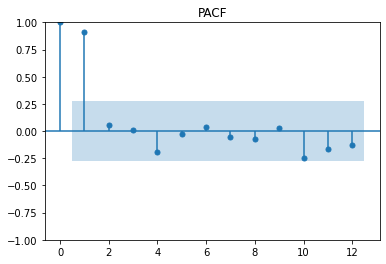

In [18]:
# Partial Autocorrelation Function (PACF)
plt.figure()
sm.graphics.tsa.plot_pacf(y, lags=12)
plt.title("PACF")
plt.show()

### ARIMA(p, d, q) 
- ACF와 PACF 모두 지수적으로 감소하거나 감쇠진동을 보이는 경우
- AR & MA
- p : AR 차수, q : MA 차수, d : 차분

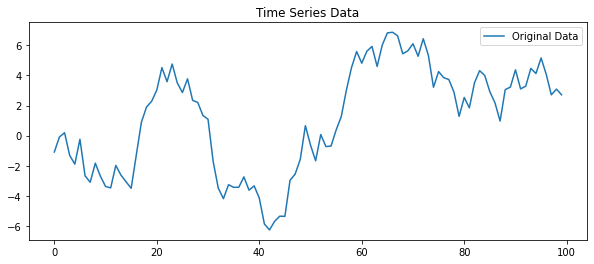

In [21]:
np.random.seed(123)
n = 100 
y = np.cumsum(np.random.normal(0, 1, n))


plt.figure(figsize=(10, 4))
plt.plot(y, label='Original Data')
plt.title('Time Series Data')
plt.legend()
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -149.706
Date:                Mon, 23 Sep 2024   AIC                            309.411
Time:                        03:00:57   BIC                            322.387
Sample:                             0   HQIC                           314.661
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8171      0.136    -13.384      0.000      -2.083      -1.551
ar.L2         -0.8811      0.124     -7.108      0.000      -1.124      -0.638
ma.L1          1.9530      8.050      0.243      0.8

C:\Users\82108\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


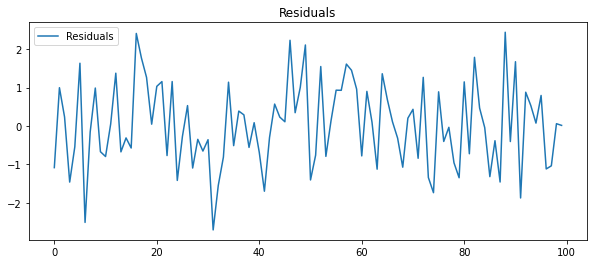

In [22]:

# ARIMA 모형 적합 (p=2, d=1, q=2)
model = ARIMA(y, order=(2, 1, 2))  # d=1은 차분이 1번 필요함을 의미
model_fit = model.fit()

# 모델 요약 출력
print(model_fit.summary())

# 잔차 분석 (모형의 잔차가 백색잡음인지 확인)
residuals = model_fit.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals, label='Residuals')
plt.title('Residuals')
plt.legend()
plt.show()


C:\Users\82108\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


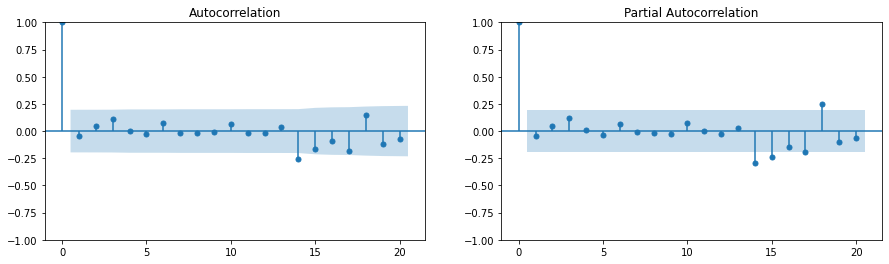

In [23]:
# ACF, PACF 그래프를 통해 잔차가 백색잡음인지 확인
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
sm.graphics.tsa.plot_acf(residuals, lags=20, ax=axes[0])
sm.graphics.tsa.plot_pacf(residuals, lags=20, ax=axes[1])
plt.show()

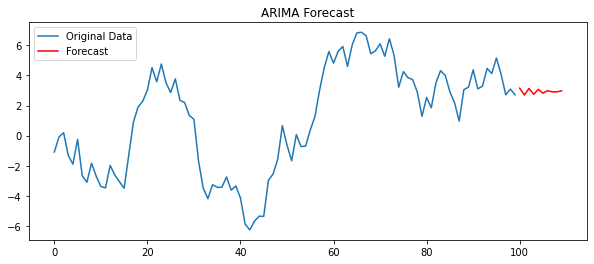

In [24]:
# 미래 예측
forecast = model_fit.forecast(steps=10)
plt.figure(figsize=(10, 4))
plt.plot(y, label='Original Data')
plt.plot(np.arange(n, n+10), forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


## MA, AR, ARIMA는 시계열 분석에 있어서 기초적인 모델
### 추후 이 모델들을 이용해 ARCH, GARCH, VAR, Kalman fiter 등 고차원 계량분석으로 확장